### GAN Model

![Alt text](ML-6149-image025.jpg)


In [1]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# import data
data = pd.read_csv('Creditcard_dataset.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2    10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
1 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
2  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512  0.251367   
3  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710 -0.767315   
4  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   

        V26       V27       V28  Amount  Class  
0 -0.221929  0.062723  0.061458  123.50      0  
1 -0.051634 -1.206921 -1.085339   40.80      0  
2 -0.129478  0.042850  0.016253    7.80      0  
3 -0.492208  0.042472 -0.054337    9.99      0  
4  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 31 columns]

Check the data shape

In [3]:
data.shape

(50492, 31)

Let's see how many genuine and limited fraudulent records we have

In [4]:
px.histogram(data, x='Class', title='Class Distribution')

### Task 2 - Data Preprocessing and Exploration

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [5]:
# drop rows with Nan values
data.dropna(inplace=True)
# drop Time column
data = data.drop(['Time'], axis=1)
# Feature scaling Amount column
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
# Splitting the dataset into features and labels
X = data.drop(['Class'], axis=1)
y = data['Class']

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions
  - Use a scatter plot to visualize our data

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['label'] = y

In [7]:
df_pca.head()

PCA1      PCA2  label
0  0.447840 -1.197485      0
1  0.582393 -0.258062      0
2  0.939390  0.728299      0
3  0.630766  0.499103      0
4  0.536287  1.055403      0

Let's Use a scatter plot to visualize our data

In [8]:
px.scatter(df_pca, x='PCA1', y='PCA2', color='label')

### Task 3 - Building the Generator Model

Write a method to create the Generator model architecture

In [19]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(32, activation='relu', input_dim=29, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(29, activation='linear'))
    model.summary()

    return model

build_generator()


d:\anaconda\envs\venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)                │        960 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_9           │ (None, 32)                │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_31 (Dense)                │ (None, 64)                │      2,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_10          │ (None, 64)                │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_32 (Dense)                │ (None, 128)               │      8,320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_11          │ (None, 128)               │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_33 (Dense)                │ (None, 29)                │      3,741 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 16,029 (62.61 KB)

 Trainable params: 15,581 (60.86 KB)

 Non-trainable params: 448 (1.75 KB)

<Sequential name=sequential_6, built=True>

### Task 4 - Building the Discriminator Model

Write a method to create the Discriminator model architecture

In [20]:
def build_discriminator():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_dim=29, kernel_initializer='he_uniform'))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001))
    model.summary()
    return model

build_discriminator()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)               │      3,840 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_35 (Dense)                │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_36 (Dense)                │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_37 (Dense)                │ (None, 32)                │      1,056 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_38 (Dense)                │ (None, 16)                │        528 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_39 (Dense)                │ (None, 1)                 │         17 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 15,777 (61.63 KB)

 Trainable params: 15,777 (61.63 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential_7, built=True>

### Task 5 - Combine Generator and Discriminator models to Build The GAN

In [21]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(generator.input_shape[1],))
    x = generator(gan_input)

    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.summary()
    return gan

Let's create a method that generates synthetic data using the Generator

In [22]:
def generate_synthetic_data(generator, n_samples):
    noise = np.random.normal(0, 1, size=(n_samples, generator.input_shape[1]))
    synthetic_data = generator.predict(noise)
    return synthetic_data

### Task 6 - Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [23]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

d:\anaconda\envs\venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 32)                │        960 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_18          │ (None, 32)                │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_61 (Dense)                │ (None, 64)                │      2,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_19          │ (None, 64)                │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_62 (Dense)                │ (None, 128)               │      8,320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_20          │ (None, 128)               │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_63 (Dense)                │ (None, 29)                │      3,741 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 16,029 (62.61 KB)

 Trainable params: 15,581 (60.86 KB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 128)               │      3,840 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_65 (Dense)                │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_66 (Dense)                │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_67 (Dense)                │ (None, 32)                │      1,056 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_68 (Dense)                │ (None, 16)                │        528 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_69 (Dense)                │ (None, 1)                 │         17 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 15,777 (61.63 KB)

 Trainable params: 15,777 (61.63 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 29)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ sequential_12 (Sequential)      │ (None, 29)                │     16,029 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ sequential_13 (Sequential)      │ (None, 1)                 │     15,777 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 31,806 (124.24 KB)

 Trainable params: 15,581 (60.86 KB)

 Non-trainable params: 16,225 (63.38 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Epoch: 0
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


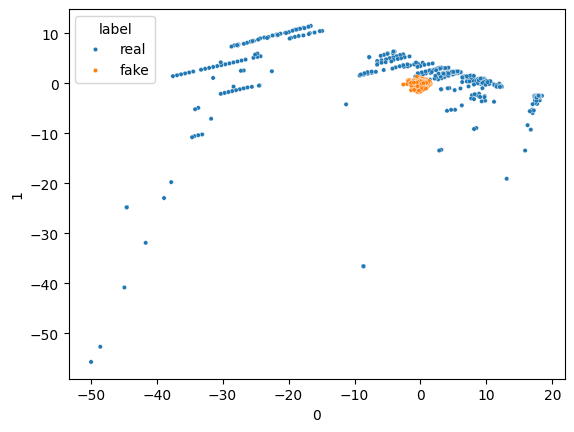

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch: 10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


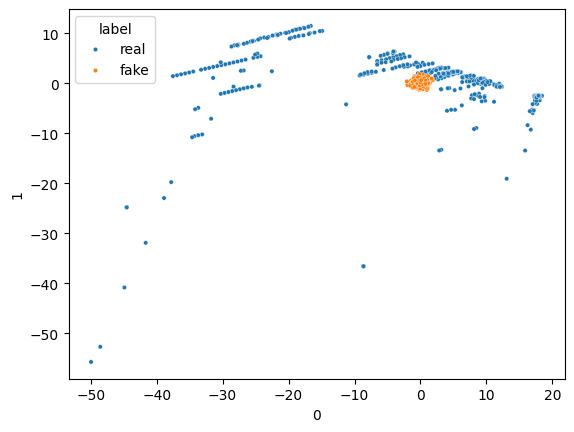

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch: 20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


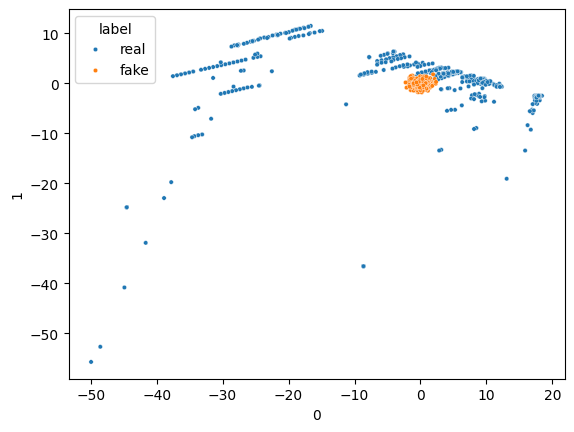

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch: 30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


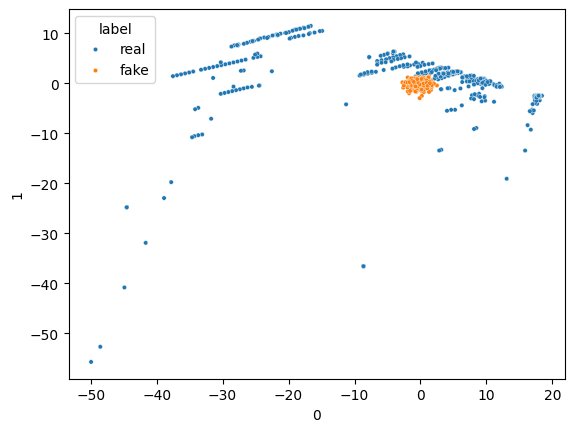

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch: 40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


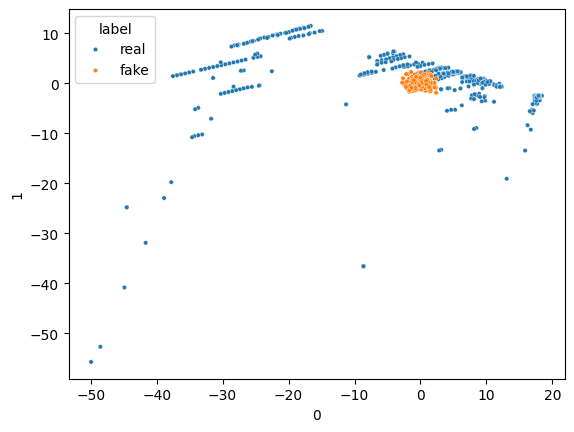

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch: 50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


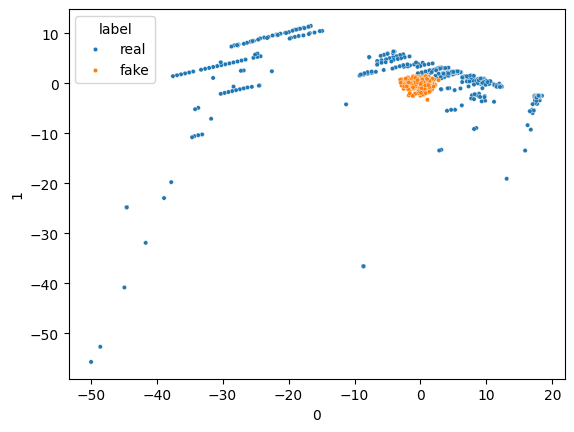

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch: 60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


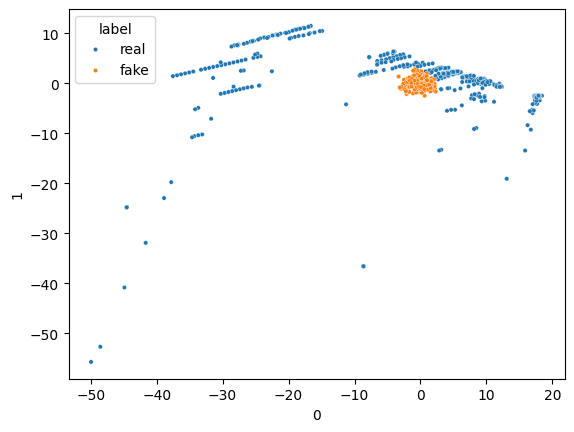

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch: 70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


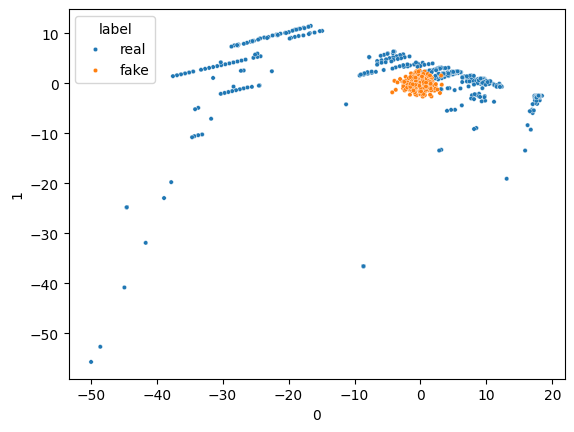

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch: 80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


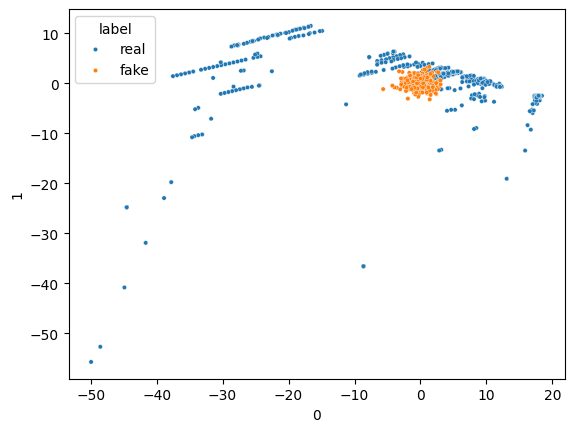

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Epoch: 90
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


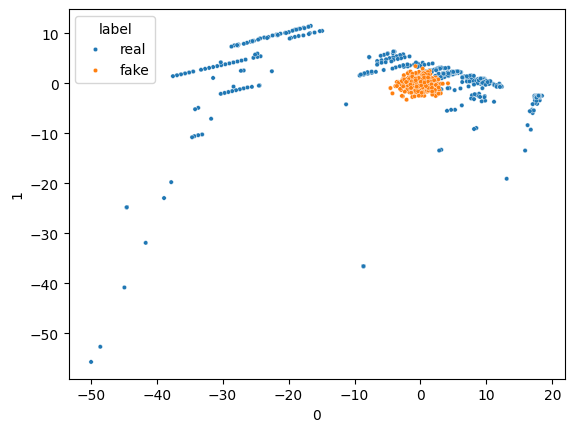

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [26]:
data_fraud = data[data['Class'] == 1]
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0001))

num_epochs = 100 # generative models uses a very large number of epochs (ex: 10000, 20000,...)
batch_size = 64
half_batch = batch_size // 2

for epoch in range(num_epochs):

    x_fake = generate_synthetic_data(generator, half_batch)
    y_fake = np.zeros((half_batch, 1))

    x_real = data_fraud.drop("Class", axis=1).sample(half_batch)
    y_real = np.ones((half_batch, 1))
    
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, y_real)
    discriminator.train_on_batch(x_fake, y_fake)

    noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))
    gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}")
        monitor_generator(generator)

### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [27]:
synthetic_fraud_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_fraud_data)
df['label'] = "fake"

df2 = data_fraud.drop("Class", axis=1)
df2['label'] = "real"
df2.columns = df.columns

df_combined = pd.concat([df, df2])
df_combined.head()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0         1         2         3         4         5         6  \
0  0.806097 -0.827710  0.924978 -0.176474 -1.026183 -0.632111  1.307159   
1 -0.699260 -0.771718  0.559917  0.255650 -0.210173  0.077522  0.013556   
2 -0.329148  0.656051  0.101276 -0.575068  0.686572  1.158154 -0.505457   
3  0.156993 -0.311595 -0.352337  0.808262 -0.093344 -0.037856 -0.593539   
4 -0.290406 -0.062106 -0.317596 -0.198897 -0.449240 -0.130094 -0.006055   

          7         8         9  ...        20        21        22        23  \
0 -0.322495 -0.302672 -0.122861  ...  0.273392 -0.825738  1.294738 -0.516463   
1  0.785003  0.184064  0.277768  ...  0.018969  0.154977  0.237626  0.015988   
2  0.692029  0.268300 -0.705441  ...  0.223063 -0.626473 -0.580264  0.731807   
3 -0.520108 -0.317532  0.342811  ...  0.203013  0.801054 -0.004277  0.014066   
4 -0.352097  0.014350  0.006785  ...  0.248413  0.163476 -0.402497  0.574704   

         24        25        26        27        28  label  
0 -0.498256  0.056726 -0.142606  1.006213 -0.766229   fake  
1  0.116192  0.512146 -0.311590 -0.390659  0.876417   fake  
2 -0.576232  0.702340  0.596850 -0.969408  0.532342   fake  
3  0.744716  0.779198  0.664303 -0.298549  0.414656   fake  
4  0.598581 -0.387294  0.486721  0.580793  0.778962   fake  

[5 rows x 30 columns]

In [31]:
# count the number of real and fake data points
print(df_combined['label'].value_counts())

label
fake    1000
real     492
Name: count, dtype: int64


Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [29]:
for col in df_combined.columns:
  plt.figure()
  fig = px.histogram(df_combined, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_10724\2318818944.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>